In [1]:
import json
import pandas as pd
import numpy
import torch
import sklearn
mother = pd.read_json('cleanedAppliances.json')

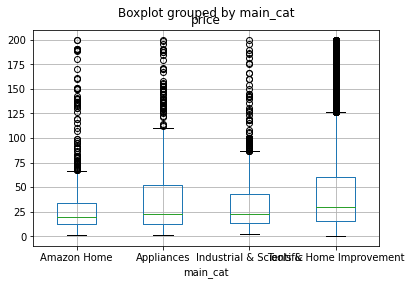

In [2]:
# 1. Boxplot by Main Cat
targetcats = ['Amazon Home', 'Appliances', 'Industrial & Scientific', 'Tools & Home Improvement']
t1df = mother.loc[mother['main_cat'].isin(targetcats)]
t1df = t1df.loc[t1df['price'] <= 200]
boxplot = t1df.boxplot(column = 'price', by='main_cat')

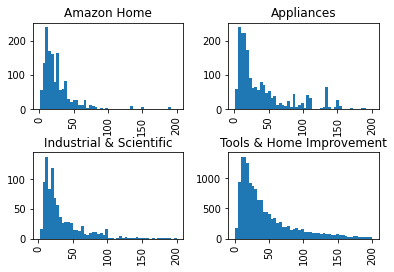

In [3]:
targetcats = ['Amazon Home', 'Appliances', 'Industrial & Scientific', 'Tools & Home Improvement']
t2df = mother.loc[mother['main_cat'].isin(targetcats)]
t2df = t2df.loc[t2df['price'] <= 200]
boxplot = t2df.hist(column = 'price', by='main_cat', bins = 50)

In [6]:
ads = pd.read_json('data/Appliances.json', lines = True)
ads1 = ads.drop(['reviewerID', 'style', 'reviewerName', 'reviewText', 'summary', 'image'], axis = 1)
ads2 = ads1.loc[ads1["verified"] != False]
ads3 = ads2[['asin', 'overall']]

In [7]:
counts = ads3.groupby('asin').count()
means = ads3.groupby('asin').mean()
merged = pd.concat([counts, means], axis=1)
merged.columns = ['count', 'mean']
merged = merged.reset_index()
merged

,asin,count,mean
0,1118461304,7,4.857143
1,1906487049,3,4.666667
2,6040985461,1,5.000000
3,7301113188,1,5.000000
4,7861850250,1,3.000000
...,...,...,...
28270,B01HJH651Y,3,3.666667
28271,B01HJH6JT2,1,5.000000
28272,B01HJH92JQ,2,2.000000
28273,B01HJHHEA0,2,3.500000


19.94235190097259


<AxesSubplot:xlabel='count', ylabel='price'>

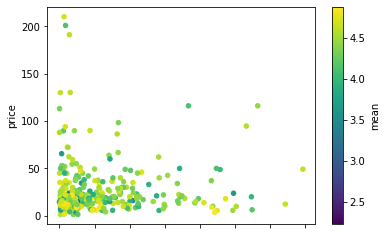

In [44]:
superMother = mother.merge(merged, how = 'left', on = 'asin')
print(numpy.mean(merged['count'].values))
t3df = superMother[(superMother['count'] >= 250) & (superMother['count'] <= 2000)]
t3df.plot.scatter(x = 'count', y = 'price', c = 'mean', colormap = 'viridis')

<AxesSubplot:xlabel='count', ylabel='price'>

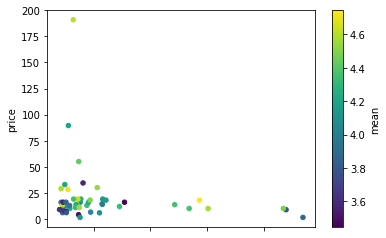

In [53]:
# Amazon Home Plot
amazonHome = superMother[superMother['main_cat'] == "Amazon Home"]
amazonHome = amazonHome[(amazonHome['count'] >= 200)]
amazonHome.plot.scatter(x = 'count', y = 'price', c = 'mean', colormap = 'viridis')

<AxesSubplot:xlabel='count', ylabel='price'>

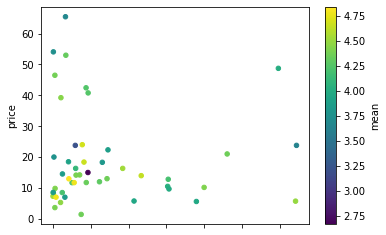

In [58]:
#
app = superMother[superMother['main_cat'] == "Appliances"]
app = app[(app['count'] >= 200)]
app.plot.scatter(x = 'count', y = 'price', c = 'mean', colormap = 'viridis')

<AxesSubplot:xlabel='count', ylabel='price'>

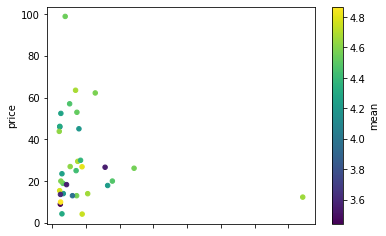

In [62]:
# I & S
IS = superMother[superMother['main_cat'] == "Industrial & Scientific"]
IS = IS[(IS['count'] >= 50)]
IS.plot.scatter(x = 'count', y = 'price', c = 'mean', colormap = 'viridis')

<AxesSubplot:xlabel='count', ylabel='price'>

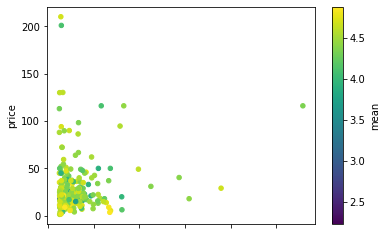

In [67]:
# THI
THI = superMother[superMother['main_cat'] == "Tools & Home Improvement"]
THI = THI[(THI['count'] >= 250)]
THI.plot.scatter(x = 'count', y = 'price', c = 'mean', colormap = 'viridis')